In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading csv

df = pd.read_csv(r"C:\Users\91700\Downloads\Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.shape #checking the shape of the dataframe

(9240, 37)

In [5]:
df.isnull().sum() #checking null values

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
## dropping a few columns

df.drop(columns=['I agree to pay the amount through cheque', 'A free copy of Mastering The Interview'], inplace=True)



In [7]:
df.drop(columns=['Prospect ID', 'Lead Number'], inplace=True)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,Modified


# imputing missing and null values

In [8]:
# check null percentage
df_null = (df.isna().mean() * 100).round(2)

In [9]:
print(df_null)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [10]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f'Value counts for {column}:\n{value_counts}\n')

Value counts for Lead Origin:
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

Value counts for Lead Source:
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Value counts for Do Not Email:
No     8506
Yes     734
Name: Do Not Email, dtype: int64

Value counts for Do Not Call:
No     9238
Yes       2
Name: Do Not Call, dtype:

In [11]:
## filling NaN values

df['Specialization'] = df['Specialization'].fillna('not provided')
df['How did you hear about X Education'] = df['How did you hear about X Education'].fillna('not provided')
df['City'] = df['City'].fillna('not provided')
df['Tags'] = df['Tags'].fillna('not provided')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('not provided')
df['What is your current occupation'] = df['What is your current occupation'].fillna('not provided')
df['Country'] = df['Country'].fillna('not provided')
df['Lead Quality'] = df['Lead Quality'].fillna('not provided')
df['Lead Profile'] = df['Lead Profile'].fillna('not provided')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [12]:
df = df.replace('Select', 'not provided')

# Display the updated DataFrame
print(df)

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                      

In [13]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education                0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [14]:
df.drop(columns=['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content'], inplace=True)
df.shape

(9240, 25)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [16]:
df['Country'].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [17]:
df['Country'] = df['Country'].replace('not provided', 'India')

# Display the updated DataFrame
print(df)

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                      

In [18]:
df.loc[df['Country'] != 'India', 'Country'] = 'Outside India'

# Display the updated DataFrame
print(df)

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                      

In [19]:
df['Country'].value_counts()

India            8953
Outside India     287
Name: Country, dtype: int64

# EDA

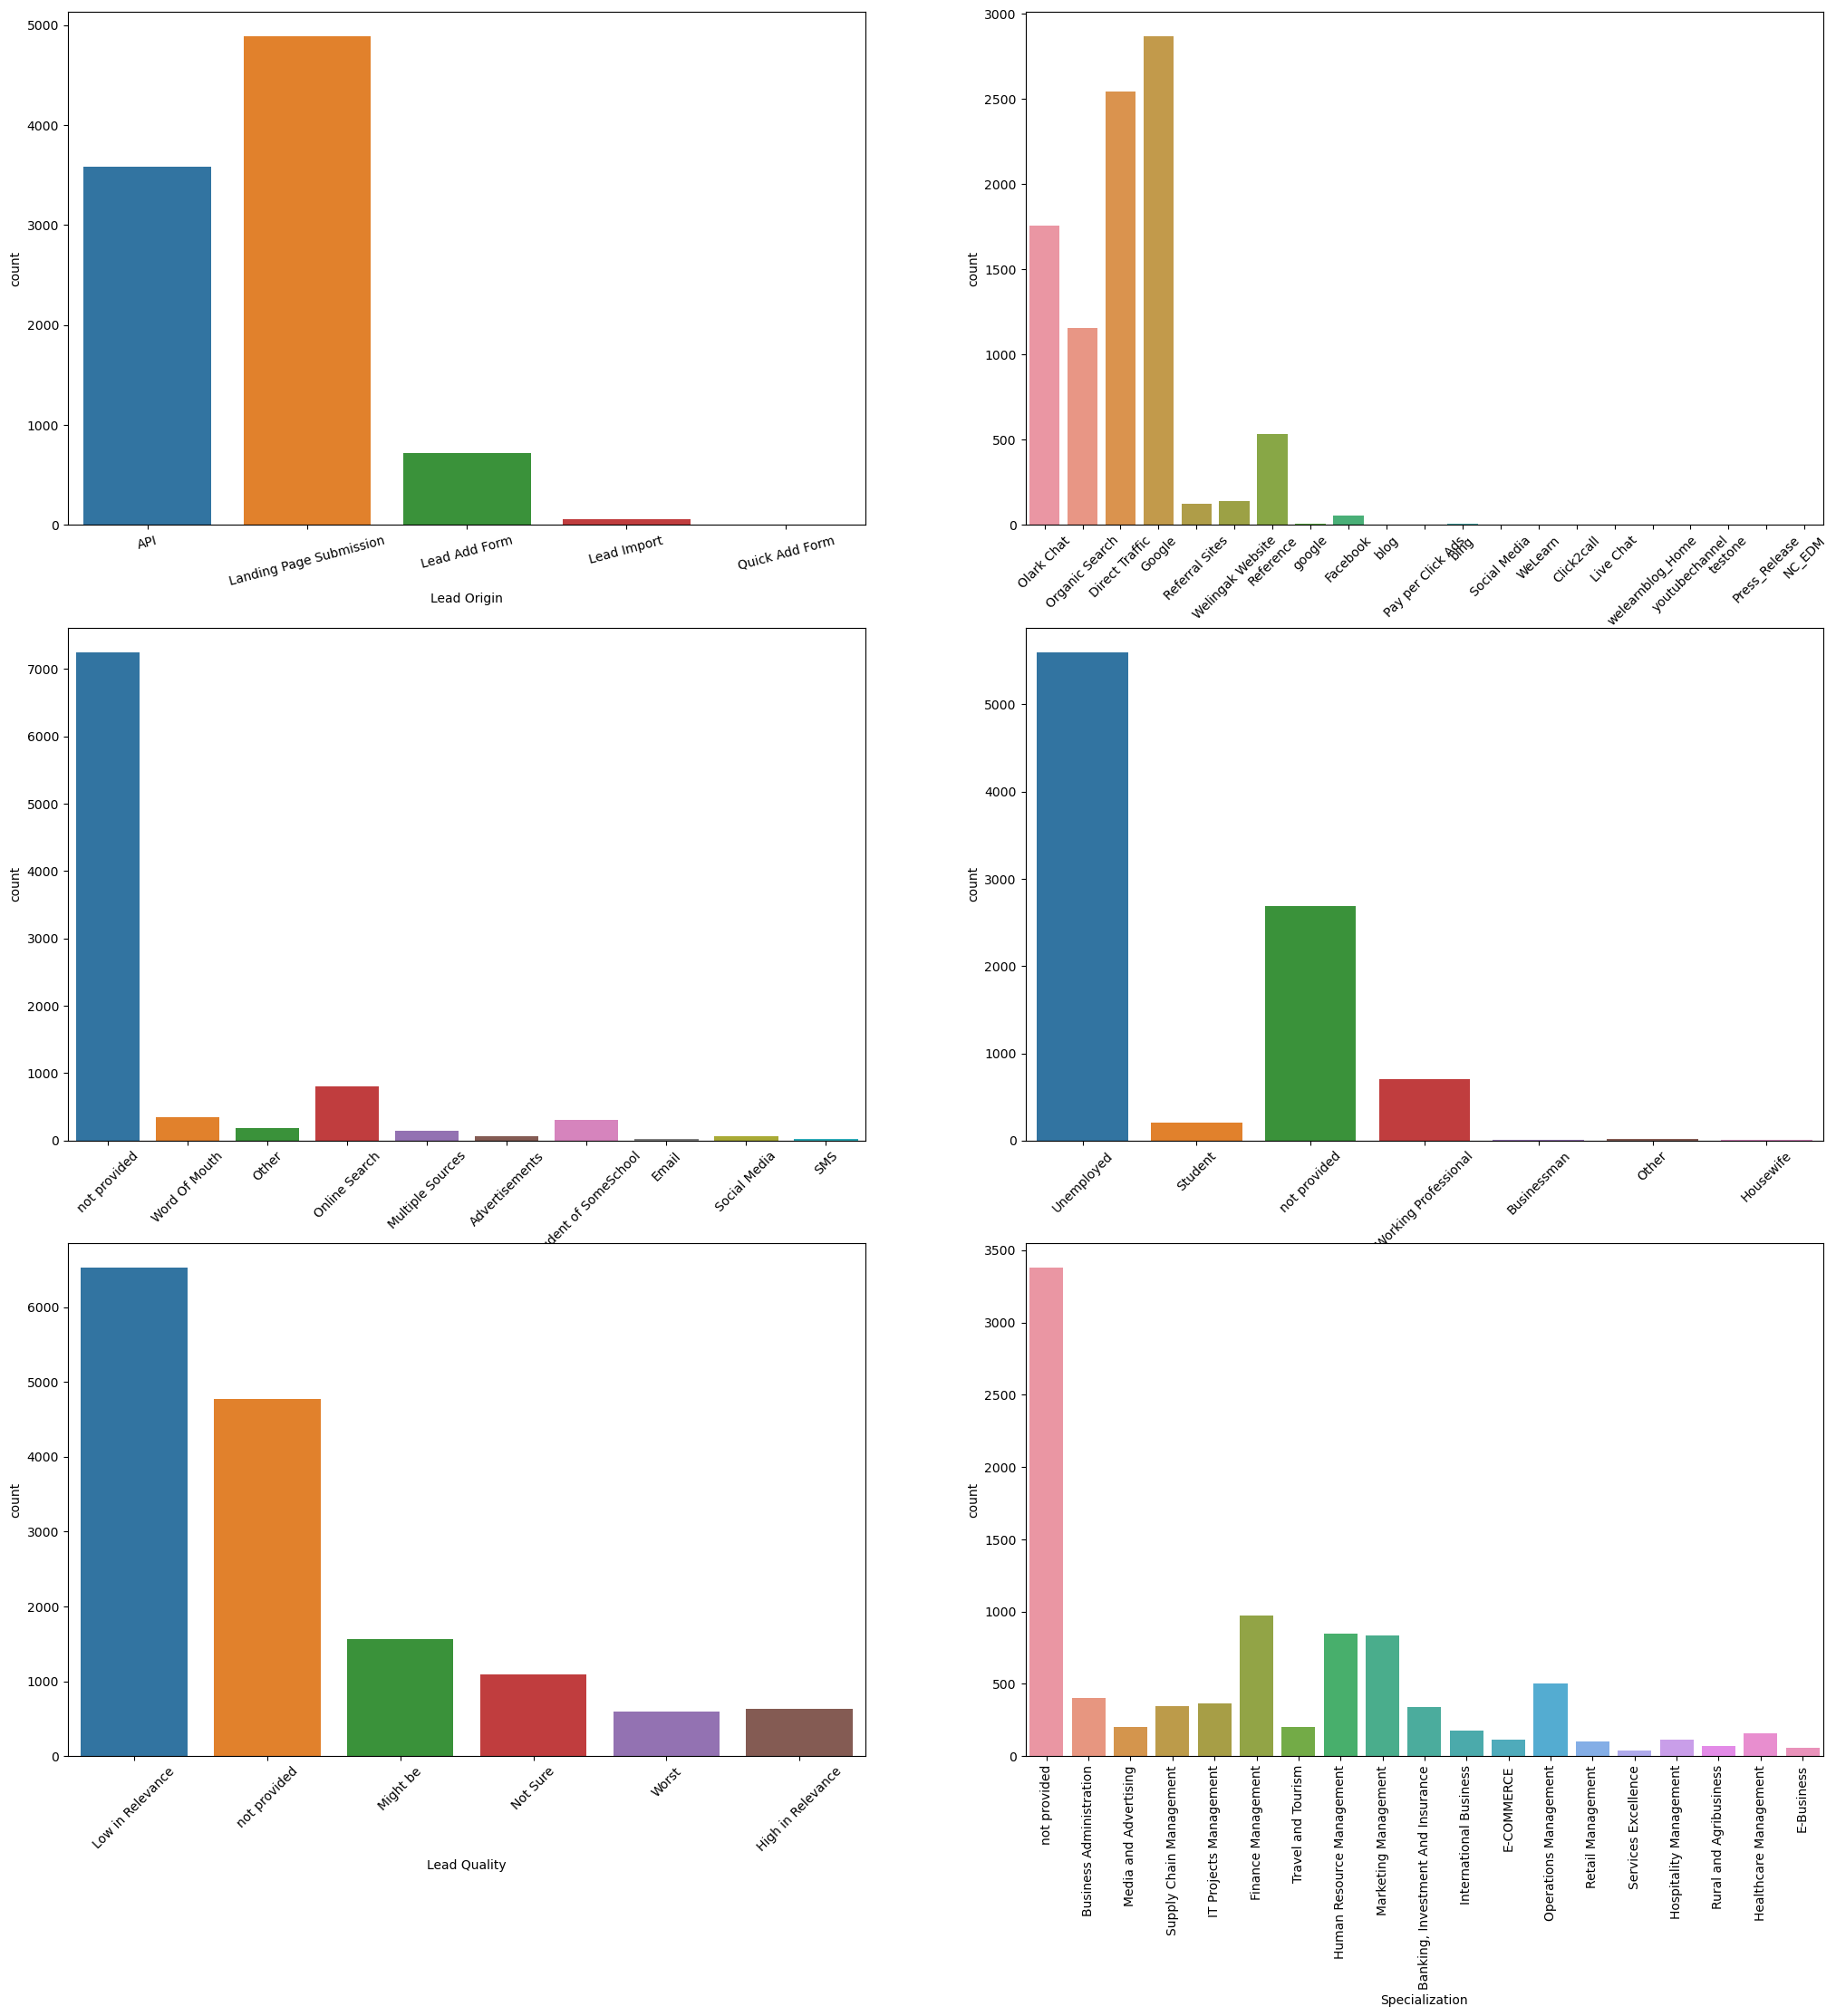

In [20]:

# Create a figure and a 3x3 subplot grid
plt.figure(figsize=(25, 25))

plt.subplot(3, 2, 1)
sns.countplot(x='Lead Origin', data=df)
plt.xticks(rotation=15)  # Rotate x-axis labels by 90 degrees

plt.subplot(3, 2, 2)
sns.countplot(x='Lead Source', data=df)
plt.xticks(rotation=45)


plt.subplot(3, 2, 3)
sns.countplot(x='How did you hear about X Education', data=df)
plt.xticks(rotation=45)

plt.subplot(3, 2, 4)
sns.countplot(x='What is your current occupation', data=df)
plt.xticks(rotation=45)

plt.subplot(3, 2, 5)
sns.countplot(x='What matters most to you in choosing a course', data=df)
plt.xticks(rotation=45)

plt.subplot(3, 2, 5)
sns.countplot(x='Lead Quality', data=df)
plt.xticks(rotation=45)

plt.subplot(3, 2, 6)
sns.countplot(x='Specialization', data=df)
plt.xticks(rotation=90)

plt.show()


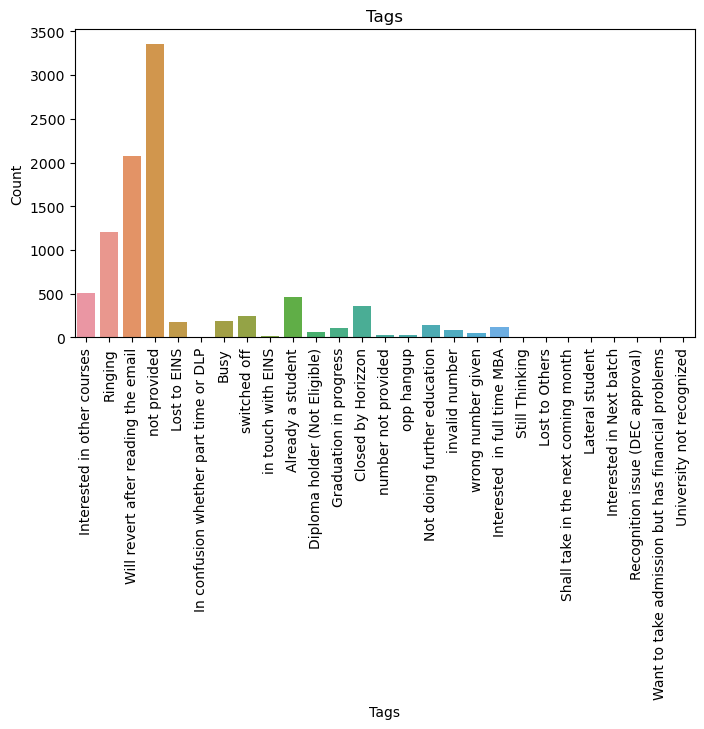

In [21]:
plt.figure(figsize=(8, 4))  # Optional: adjust the figure size
sns.countplot(data=df, x='Tags' )
plt.title('Tags')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Optional: rotate x-axis labels for better visibility
plt.show()

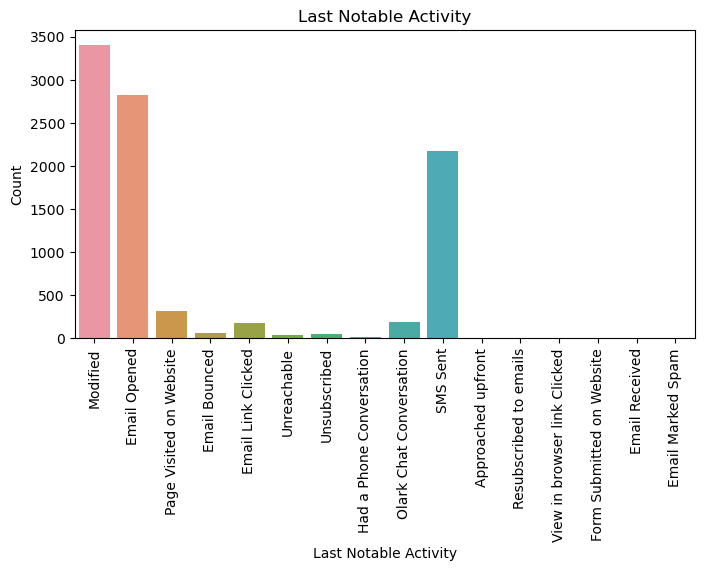

In [22]:
plt.figure(figsize=(8, 4))  # Optional: adjust the figure size
sns.countplot(data=df, x='Last Notable Activity' )
plt.title('Last Notable Activity')
plt.xlabel('Last Notable Activity')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Optional: rotate x-axis labels for better visibility
plt.show()

## NUMERICAL VARIABLES

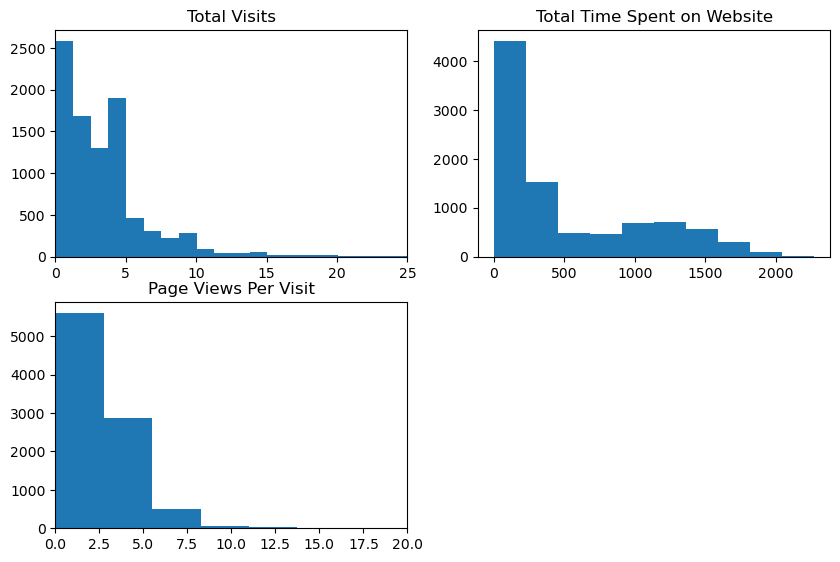

In [23]:
plt.figure(figsize = (10,10))
plt.subplot(321)
plt.hist(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(322)
plt.hist(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')
 
plt.subplot(323)
plt.hist(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show( )  

# INSIGHTS TO CHECK WHICH LEADS ARE MOSTLY CONVERTED

In [25]:
df['City'].value_counts()

not provided                   3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

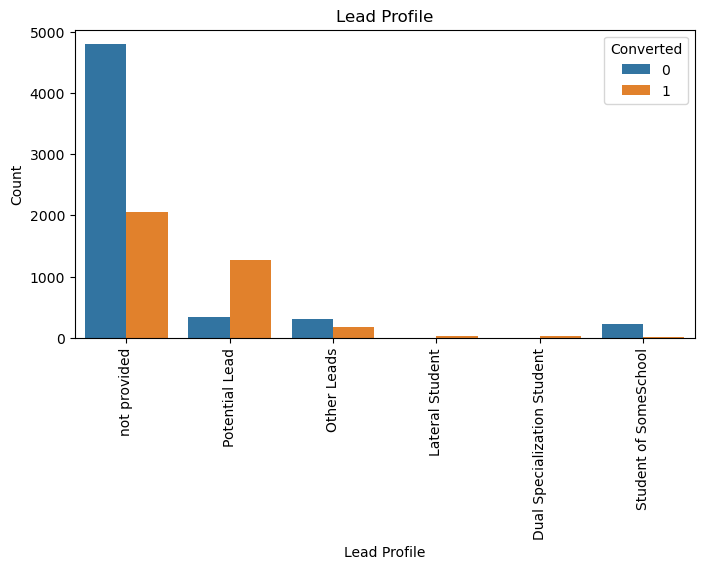

In [26]:

plt.figure(figsize=(8, 4))  # Optional: adjust the figure size
sns.countplot(data=df, x='Lead Profile' , hue='Converted')
plt.title('Lead Profile')
plt.xlabel('Lead Profile')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Optional: rotate x-axis labels for better visibility
plt.show()

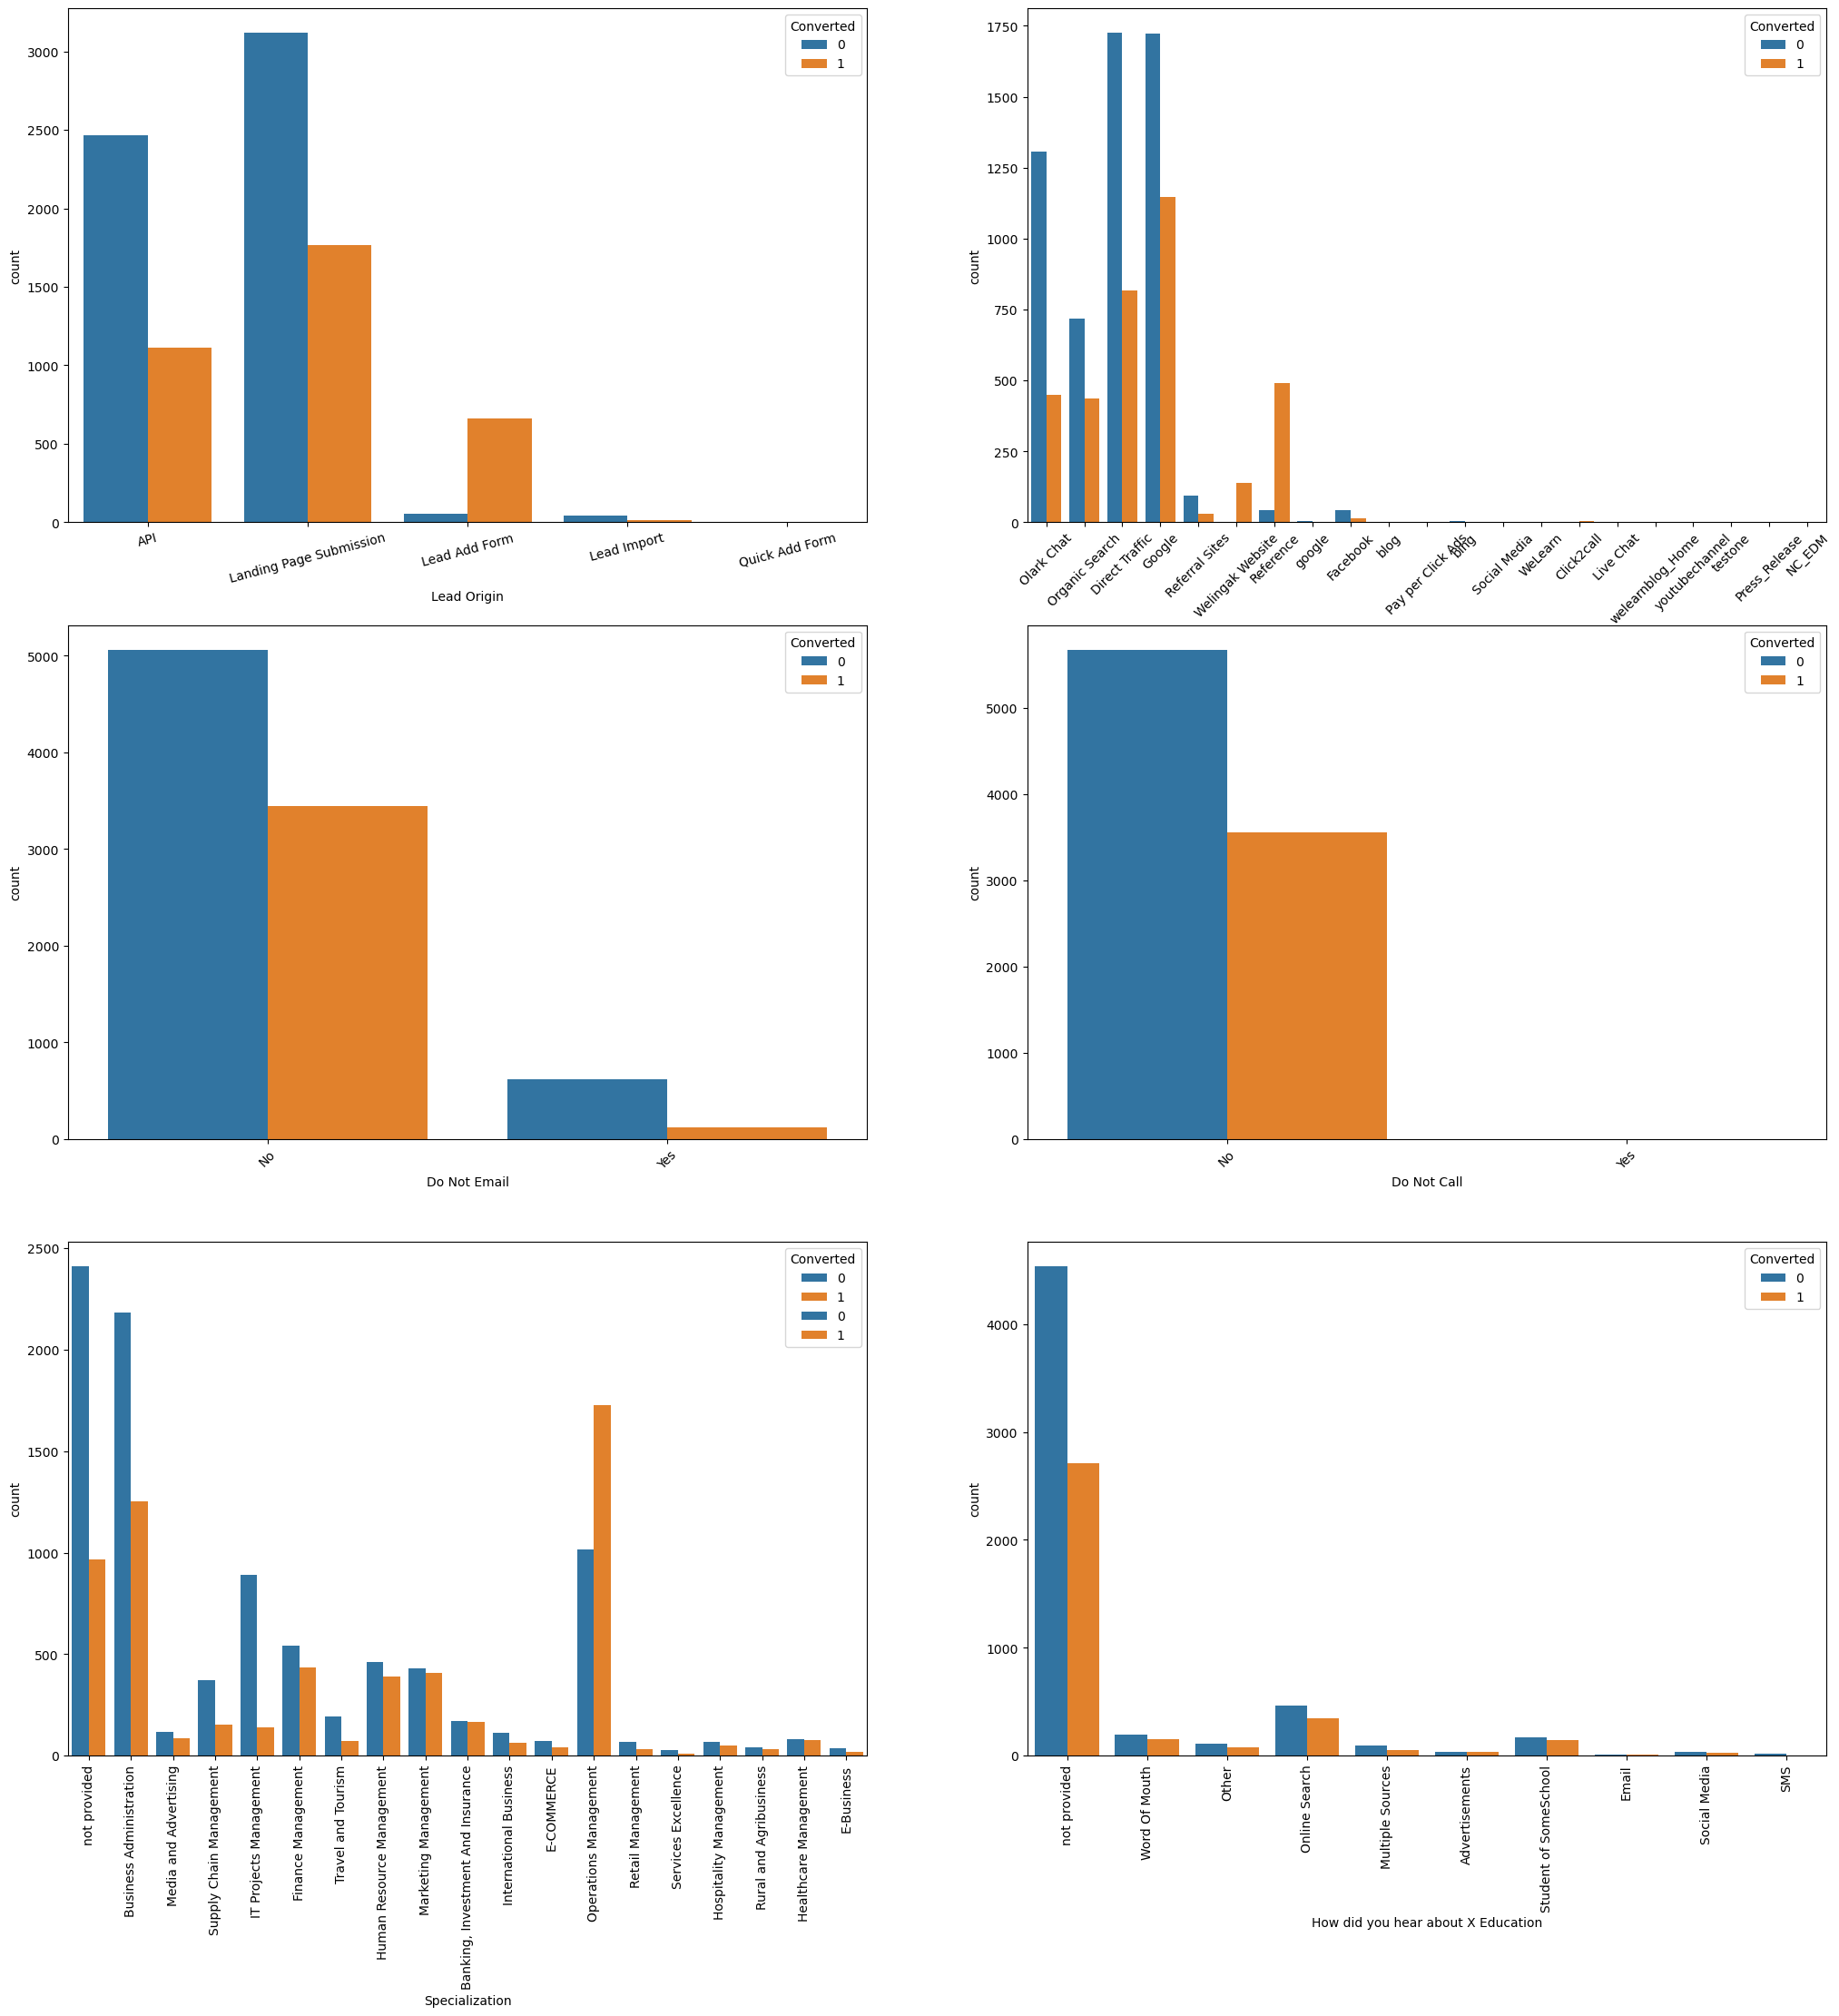

In [27]:

# Create a figure and a 3x3 subplot grid
plt.figure(figsize=(25, 25))

plt.subplot(3, 2, 1)
sns.countplot(x='Lead Origin', data=df, hue='Converted')
plt.xticks(rotation=15)  # Rotate x-axis labels by 90 degrees

plt.subplot(3, 2, 2)
sns.countplot(x='Lead Source', data=df, hue='Converted')
plt.xticks(rotation=45)


plt.subplot(3, 2, 3)
sns.countplot(x='Do Not Email', data=df, hue='Converted')
plt.xticks(rotation=45)

plt.subplot(3, 2, 4)
sns.countplot(x='Do Not Call', data=df, hue='Converted')
plt.xticks(rotation=45)

plt.subplot(3, 2, 5)
sns.countplot(x='Last Activity', data=df, hue='Converted')
plt.xticks(rotation=45)

plt.subplot(3, 2, 5)
sns.countplot(x='Specialization', data=df, hue='Converted')
plt.xticks(rotation=90)

plt.subplot(3, 2, 6)
sns.countplot(x='How did you hear about X Education', data=df, hue='Converted')
plt.xticks(rotation=90)

plt.show()

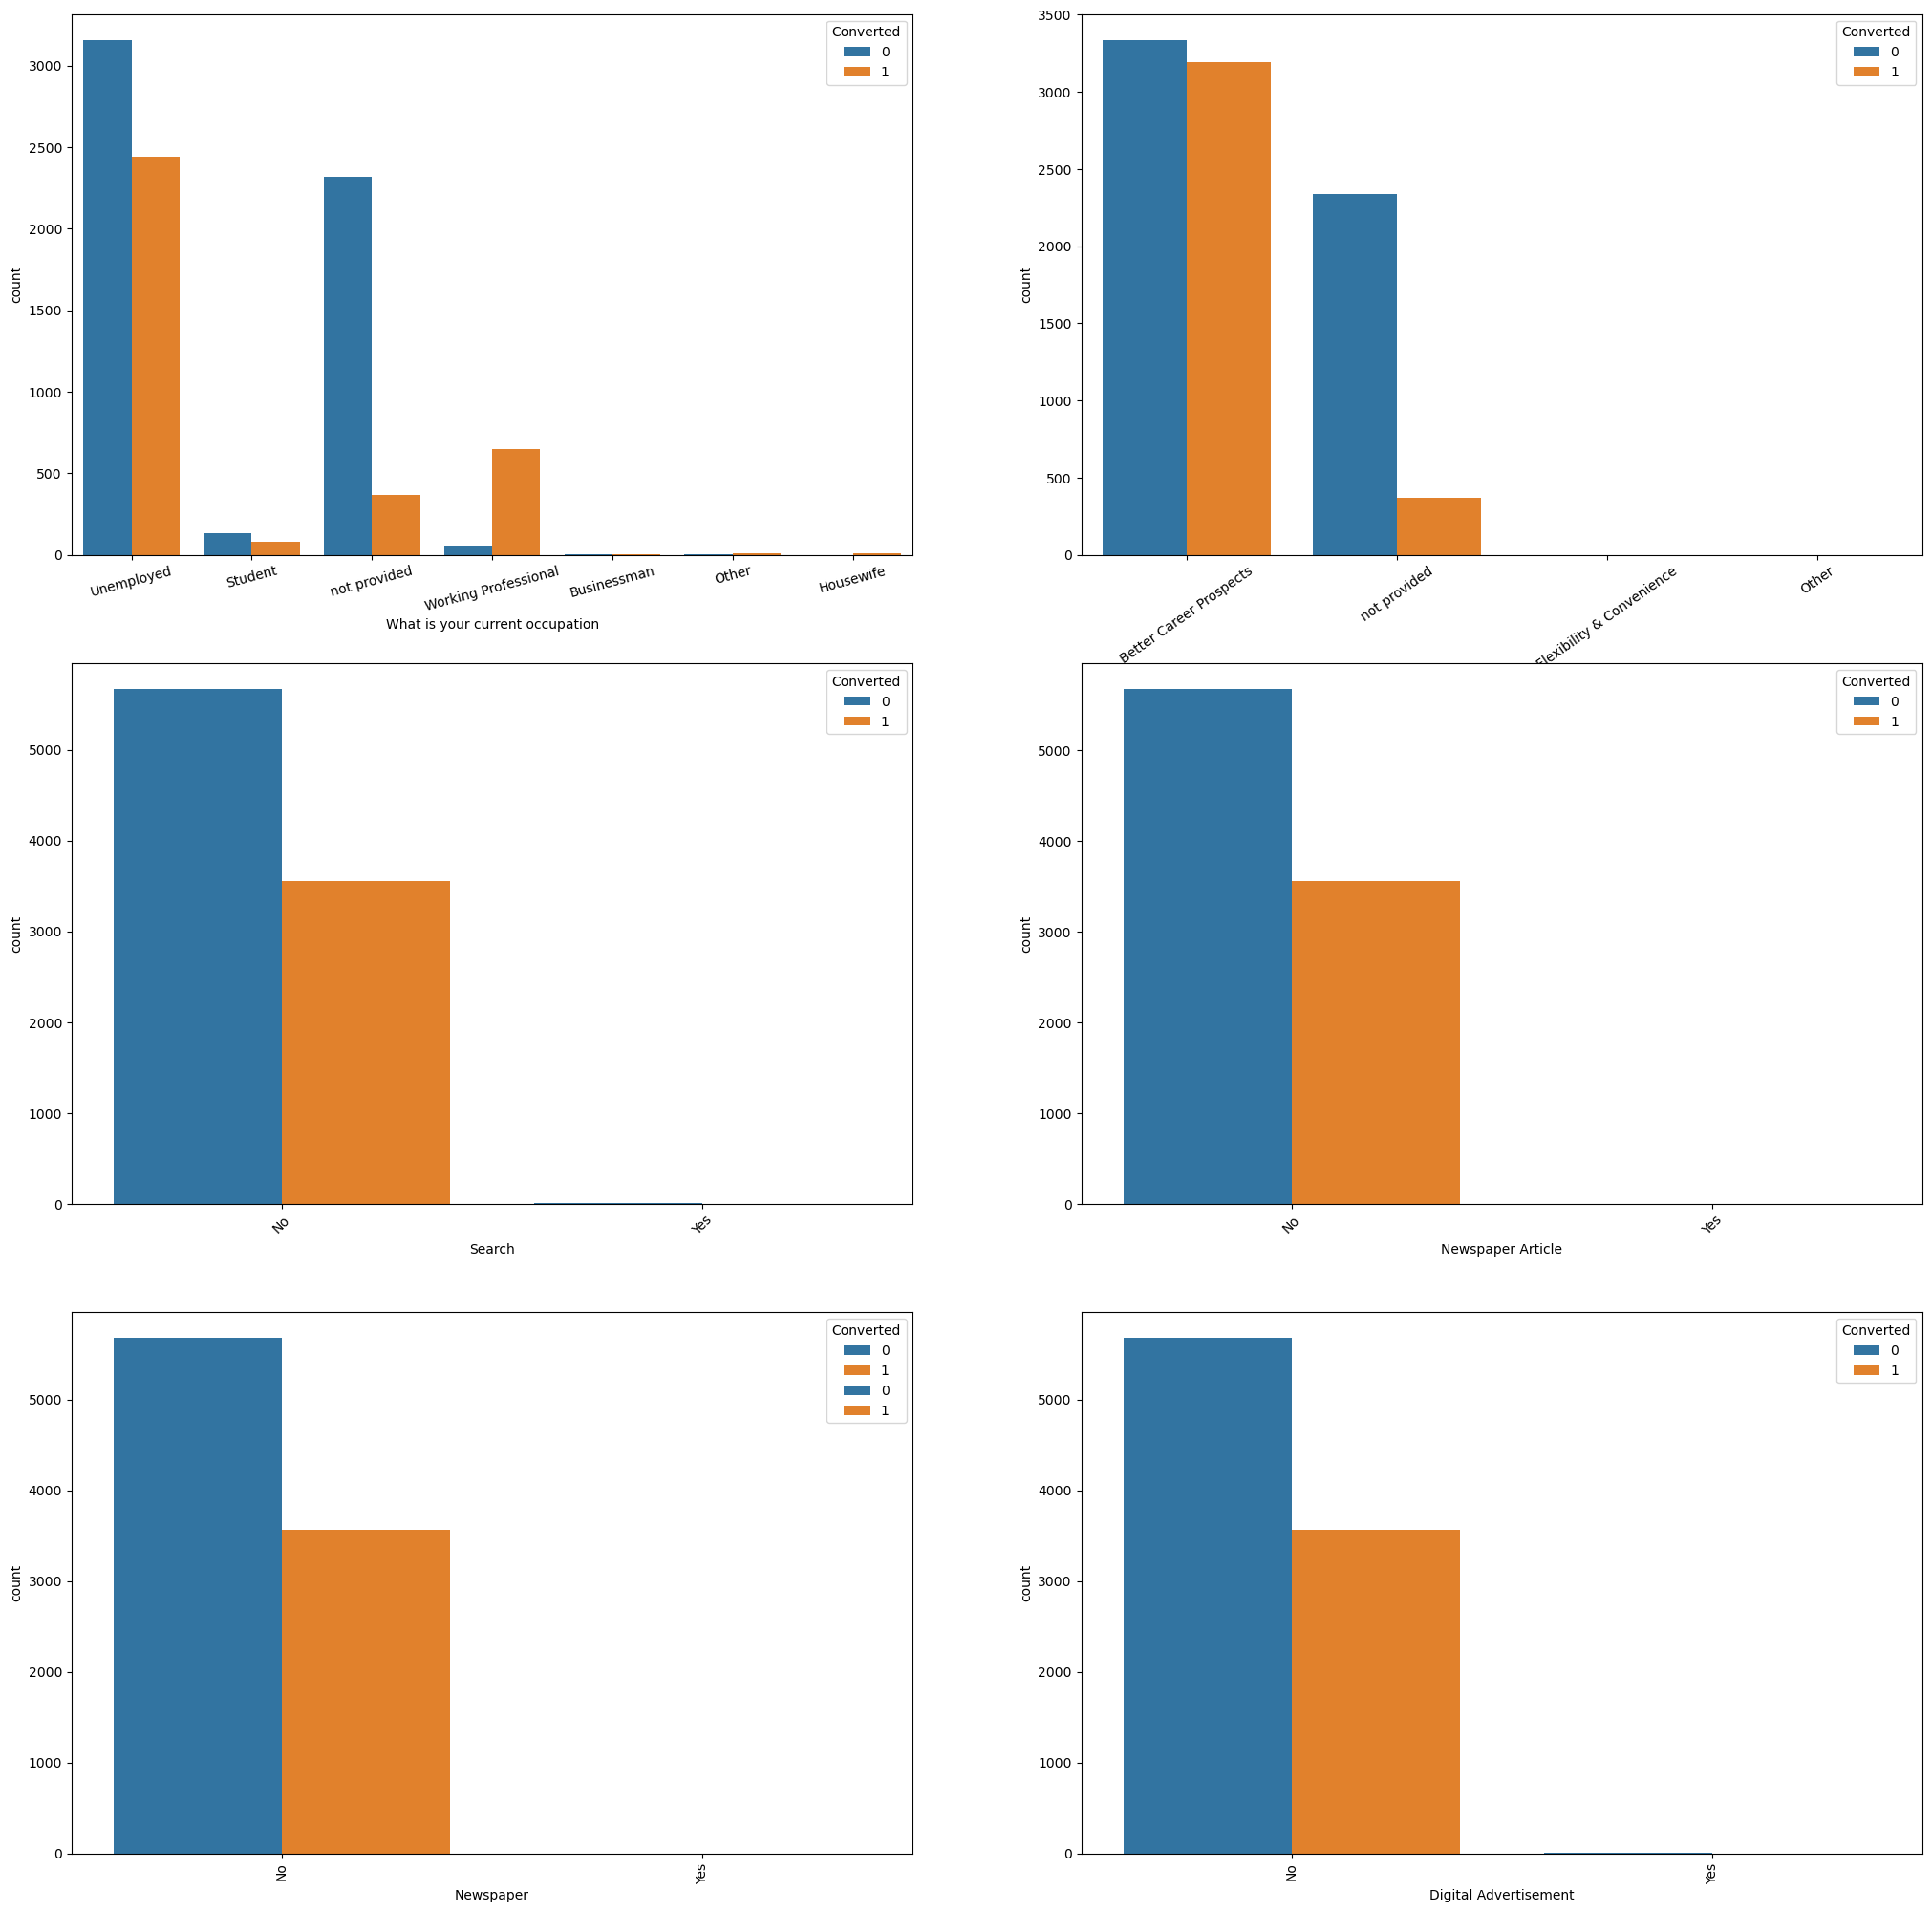

In [28]:

# Create a figure and a 3x3 subplot grid
plt.figure(figsize=(25, 25))

plt.subplot(3, 2, 1)
sns.countplot(x='What is your current occupation', data=df, hue='Converted')
plt.xticks(rotation=15)  # Rotate x-axis labels by 90 degrees

plt.subplot(3, 2, 2)
sns.countplot(x='What matters most to you in choosing a course', data=df, hue='Converted')
plt.xticks(rotation=35)


plt.subplot(3, 2, 3)
sns.countplot(x='Search', data=df, hue='Converted')
plt.xticks(rotation=45)

plt.subplot(3, 2, 4)
sns.countplot(x='Newspaper Article', data=df, hue='Converted')
plt.xticks(rotation=45)

plt.subplot(3, 2, 5)
sns.countplot(x='X Education Forums', data=df, hue='Converted')
plt.xticks(rotation=45)

plt.subplot(3, 2, 5)
sns.countplot(x='Newspaper', data=df, hue='Converted')
plt.xticks(rotation=90)

plt.subplot(3, 2, 6)
sns.countplot(x='Digital Advertisement', data=df, hue='Converted')
plt.xticks(rotation=90)

plt.show()

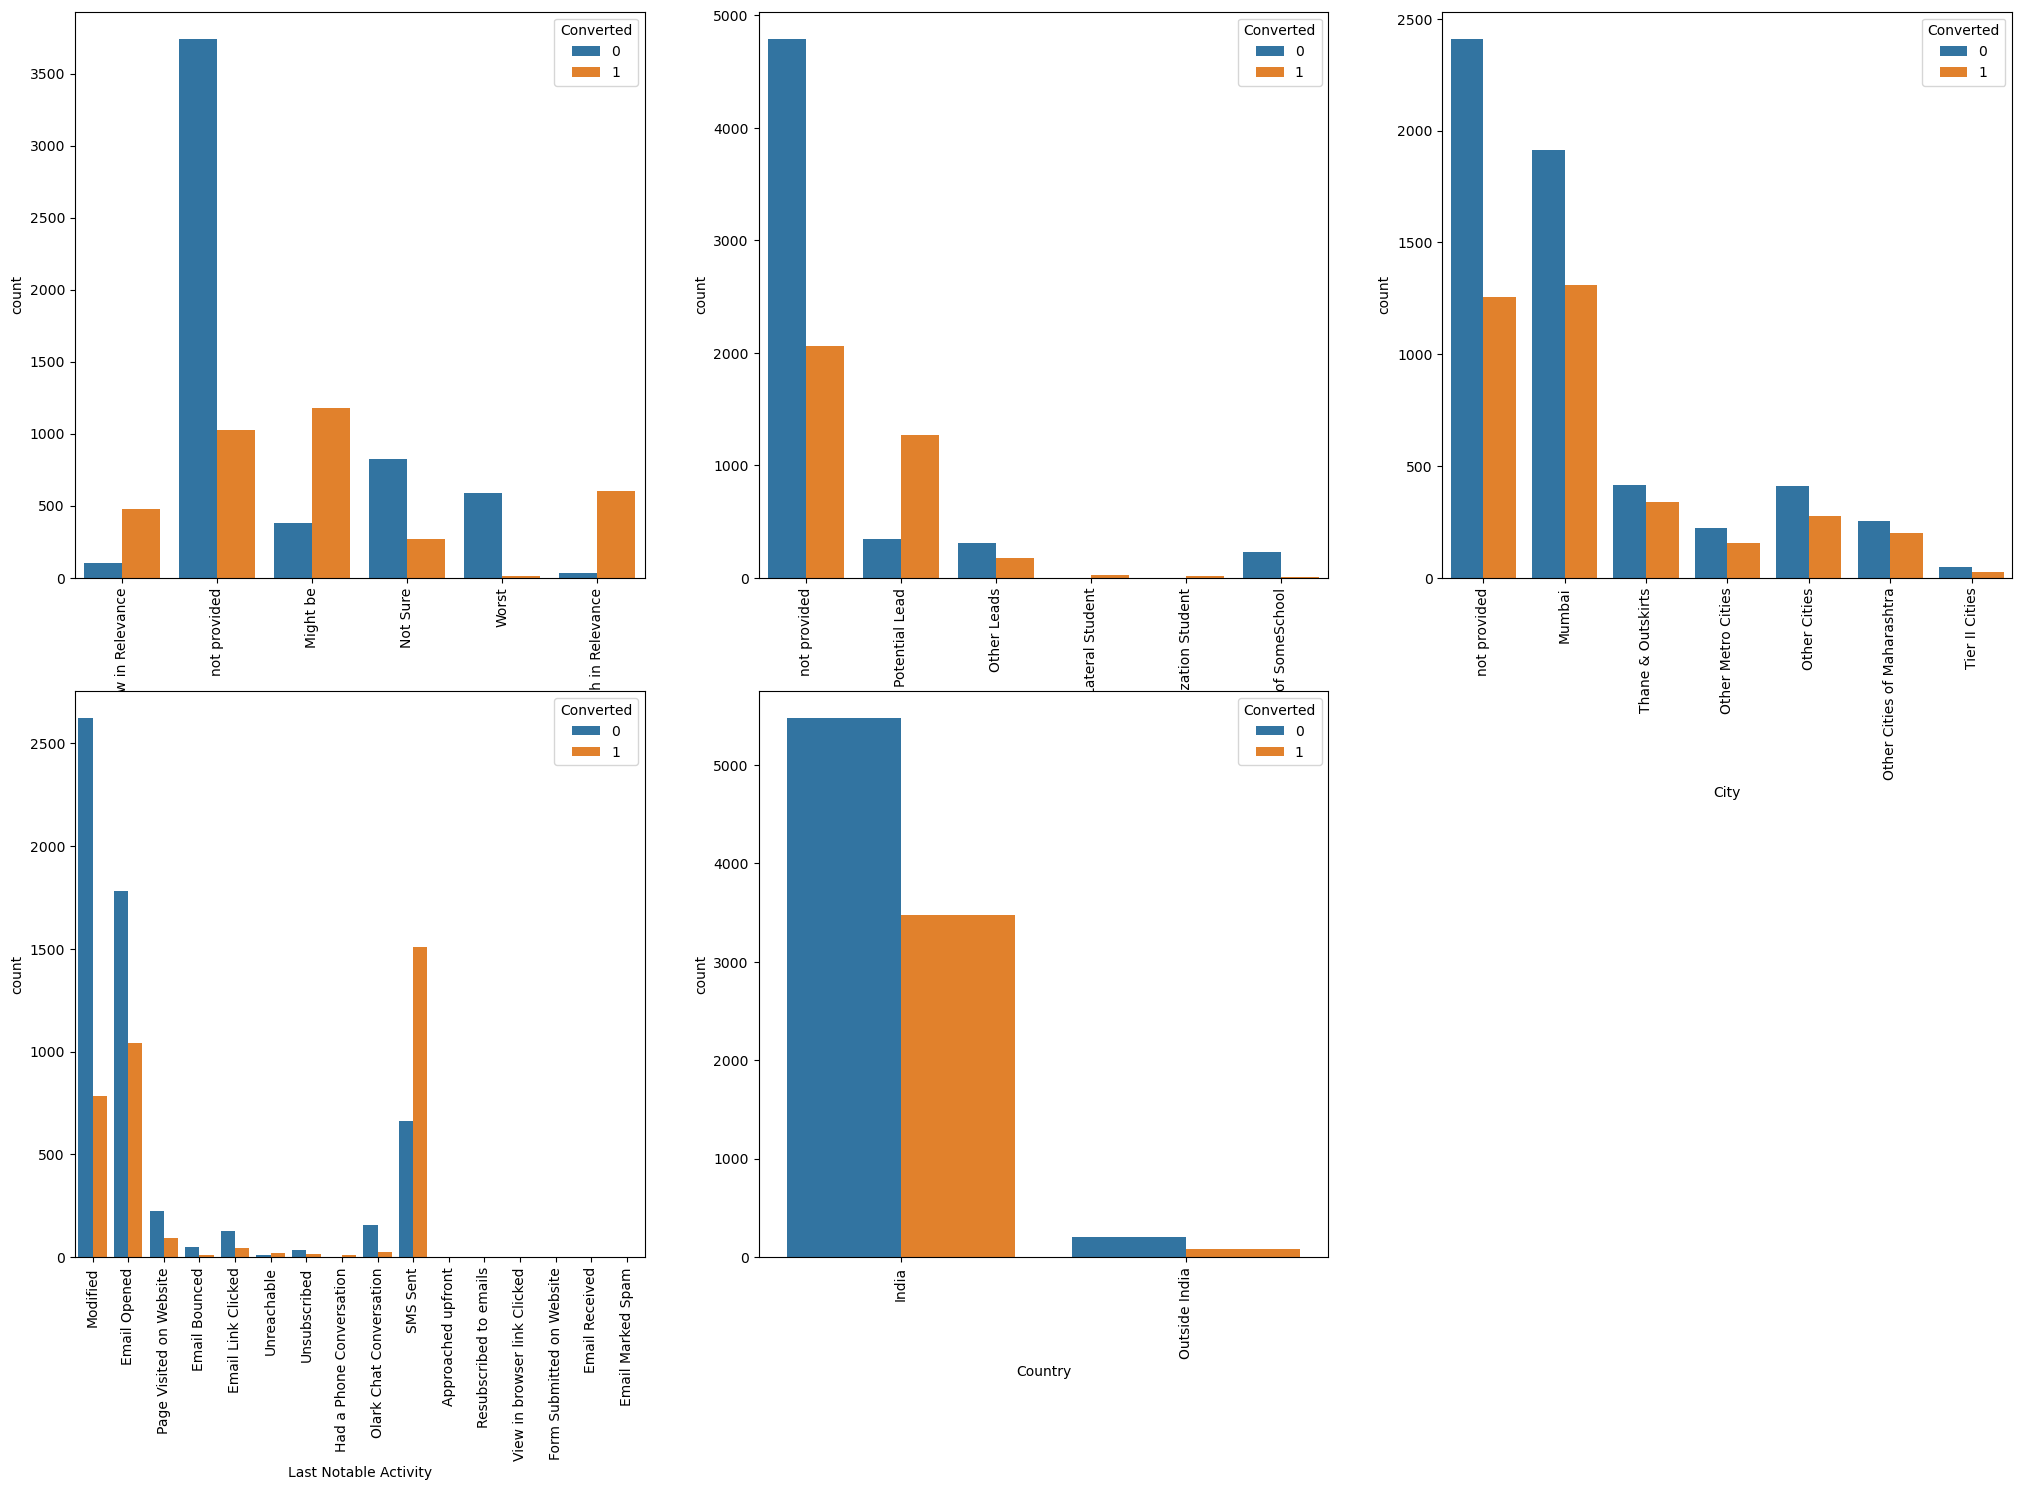

In [29]:
# Create a figure and a 3x3 subplot grid
plt.figure(figsize=(25, 25))

plt.subplot(3, 3, 1)
sns.countplot(x='Lead Quality', data=df, hue='Converted')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees

plt.subplot(3, 3, 2)
sns.countplot(x='Lead Profile', data=df, hue='Converted')
plt.xticks(rotation=90)


plt.subplot(3, 3, 3)
sns.countplot(x='City', data=df, hue='Converted')
plt.xticks(rotation=90)

plt.subplot(3, 3, 4)
sns.countplot(x='Last Notable Activity', data=df, hue='Converted')
plt.xticks(rotation=90)

plt.subplot(3, 3, 5)
sns.countplot(x='Country', data=df, hue='Converted')
plt.xticks(rotation=90)

    
plt.show()

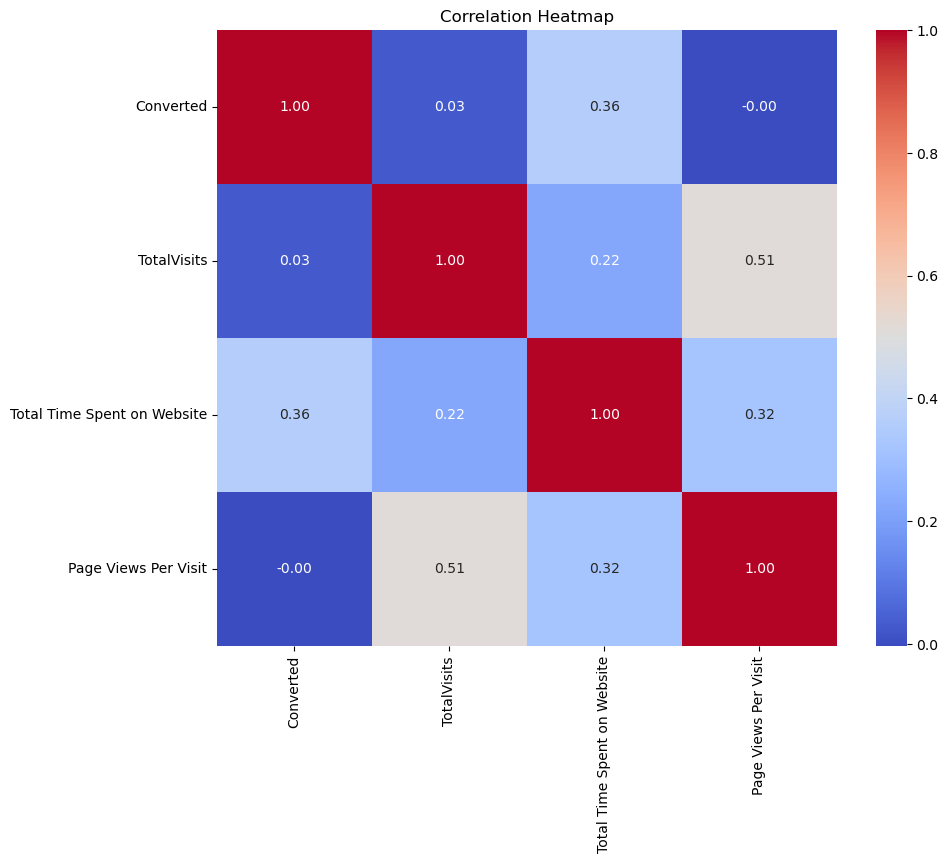

In [30]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add labels and title
plt.title("Correlation Heatmap")
plt.show()

## outlier treatment

In [31]:
df1 = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
df1.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


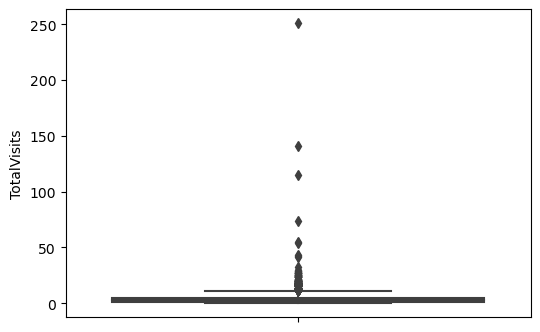

In [32]:
plt.figure(figsize = (6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

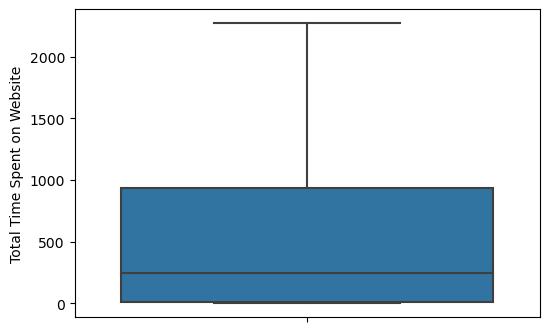

In [33]:
plt.figure(figsize = (6,4))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

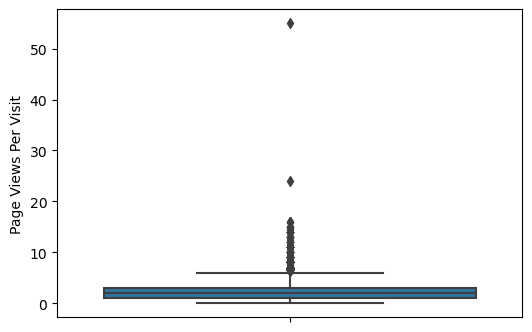

In [34]:
plt.figure(figsize = (6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

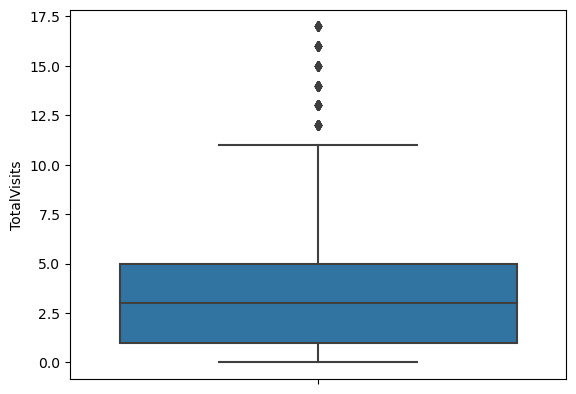

In [35]:
Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]

sns.boxplot(y=df['TotalVisits'])
plt.show()

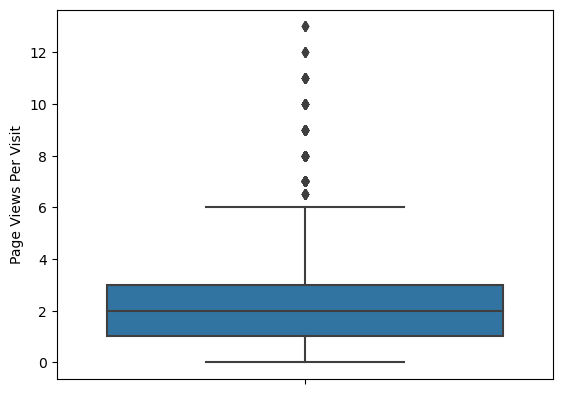

In [36]:
Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]


sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

In [37]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.32
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [38]:
df.shape

(8929, 25)

# CREATING Dummies 

In [39]:
## dropping cols
df.drop(columns=['Tags', 'Country'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8929 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8929 non-null   object 
 1   Lead Source                                    8900 non-null   object 
 2   Do Not Email                                   8929 non-null   object 
 3   Do Not Call                                    8929 non-null   object 
 4   Converted                                      8929 non-null   int64  
 5   TotalVisits                                    8929 non-null   float64
 6   Total Time Spent on Website                    8929 non-null   int64  
 7   Page Views Per Visit                           8929 non-null   float64
 8   Last Activity                                  8929 non-null   object 
 9   Specialization                                 8929 

In [40]:
cols= df.select_dtypes(include=['object']).columns
cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Quality',
       'Lead Profile', 'City', 'Last Notable Activity'],
      dtype='object')

In [41]:
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Quality',
       'Lead Profile', 'City', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
Lead_data_dum = pd.concat([df, dummy], axis=1)
Lead_data_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,not provided,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,not provided,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [42]:
Lead_data_dum = Lead_data_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Quality',
       'Lead Profile', 'City', 'Last Notable Activity'], 1)
Lead_data_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# TRAIN TEST SPLIT`

In [43]:
X = Lead_data_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
y = Lead_data_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [45]:
## splitting 70-30

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [46]:
scaler = MinMaxScaler()
X_train [['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' ]] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
123,0.153846,0.076923,0.017165,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1992,0.230769,0.115385,0.103873,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2137,0.307692,0.102308,0.029049,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1323,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
368,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


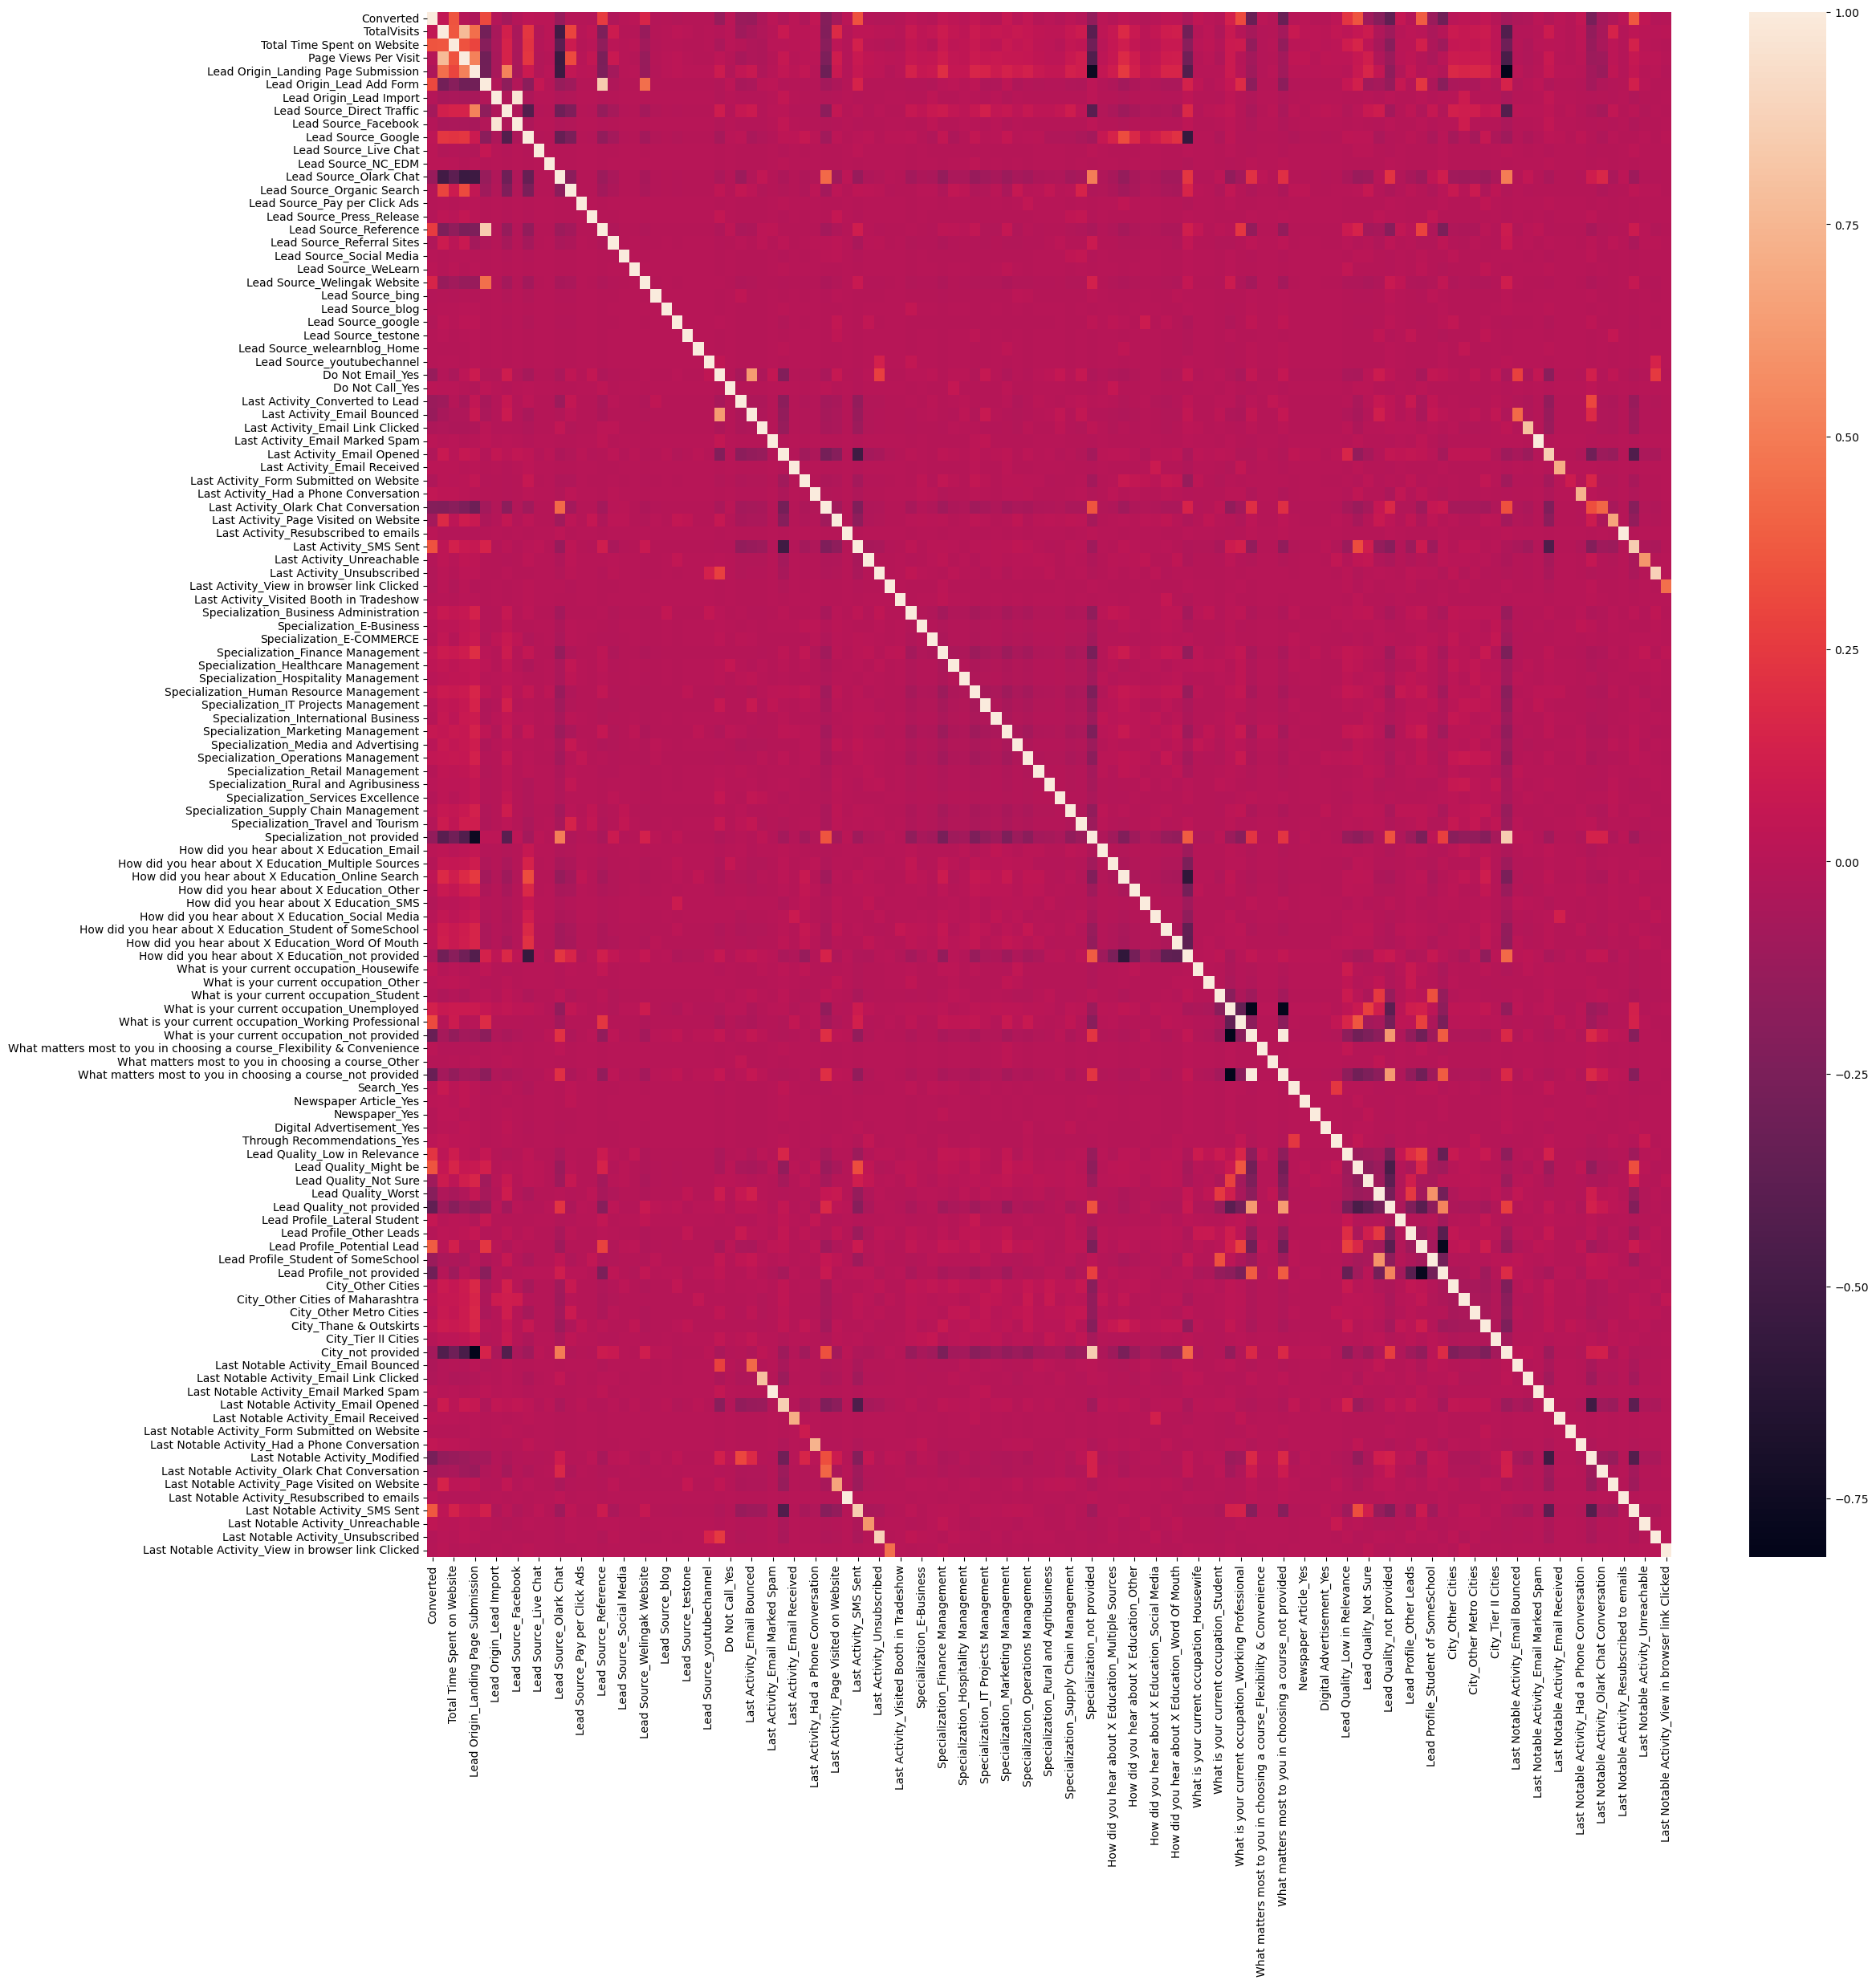

In [47]:
plt.figure(figsize= (25,25))
sns.heatmap(Lead_data_dum.corr(), annot = False)
plt.show()

In [48]:
logreg = LogisticRegression()


In [49]:
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 57),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 91),
 ('Lead Source_Direct Traffic', False, 19),
 ('Lead Source_Facebook', False, 74),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Live Chat', False, 45),
 ('Lead Source_NC_EDM', False, 23),
 ('Lead Source_Olark Chat', False, 2),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Pay per Click Ads', False, 94),
 ('Lead Source_Press_Release', False, 79),
 ('Lead Source_Reference', False, 55),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 60),
 ('Lead Source_WeLearn', False, 80),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 58),
 ('Lead Source_blog', False, 100),
 ('Lead Source_google', False, 42),
 ('Lead Source_testone', False, 85),
 ('Lead Source_welearnblog_Home', False, 97),

In [51]:
colrs = X_train.columns[rfe.support_]

In [52]:
X_train = X_train[colrs]

In [53]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6234
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2207.2
Date:                Mon, 25 Sep 2023   Deviance:                       4414.3
Time:                        23:42:30   Pearson chi2:                 6.72e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4615
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8360      0.142      5.883      0.000       0.557       1.115
TotalVisits                                              0.8722      0.272      3.201      0.001       0.338       1.406
Total Time Spent on Website                             -3.3789      0.400     -8.456      0.000      -4.162      -2.596
Page Views Per Visit                                     3.8883      0.172     22.581      0.000       3.551       4.226
Lead Origin_Lead Add Form                                1.8814      0.247      7.604      0.000       1.396       2.366
Lead Source_Welingak Website                             3.3984      0.761      4.464      0.000       1.906       4.891
Do Not Email_Yes                                        -1.3787      0.195     -7.067      0.000      -1.761      -0.996
Last Activity_Had a Phone Conversation                   1.7831      0.735      2.425      0.015       0.342       3.224
Last Activity_SMS Sent                                   1.6013      0.084     19.013      0.000       1.436       1.766
What is your current occupation_Working Professional     1.7303      0.212      8.178      0.000       1.316       2.145
Lead Quality_Might be                                   -1.5150      0.155     -9.765      0.000      -1.819      -1.211
Lead Quality_Not Sure                                   -3.3358      0.166    -20.094      0.000      -3.661      -3.010
Lead Quality_Worst                                      -5.9894      0.485    -12.353      0.000      -6.940      -5.039
Lead Quality_not provided                               -3.1932      0.139    -23.041      0.000      -3.465      -2.922
Last Notable Activity_Unreachable                        2.0533      0.587      3.498      0.000       0.903       3.204
Last Notable Activity_Unsubscribed                       1.9724      0.544      3.626      0.000       0.906       3.039
========================================================================================================================
"""

In [54]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,5.73
0,TotalVisits,5.57
2,Page Views Per Visit,2.04
9,Lead Quality_Might be,1.82
7,Last Activity_SMS Sent,1.72
12,Lead Quality_not provided,1.72
3,Lead Origin_Lead Add Form,1.47
10,Lead Quality_Not Sure,1.35
4,Lead Source_Welingak Website,1.31
8,What is your current occupation_Working Profes...,1.31


In [55]:
X_train.drop('Total Time Spent on Website', axis = 1, inplace = True)

In [56]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6250
Model:                            GLM   Df Residuals:                     6235
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2244.5
Date:                Mon, 25 Sep 2023   Deviance:                       4489.1
Time:                        23:42:30   Pearson chi2:                 6.74e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4550
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6458      0.139      4.652      0.000       0.374       0.918
TotalVisits                                             -0.7574      0.200     -3.795      0.000      -1.149      -0.366
Page Views Per Visit                                     3.7149      0.169     22.046      0.000       3.385       4.045
Lead Origin_Lead Add Form                                2.0885      0.245      8.516      0.000       1.608       2.569
Lead Source_Welingak Website                             3.3394      0.760      4.392      0.000       1.849       4.830
Do Not Email_Yes                                        -1.3971      0.194     -7.218      0.000      -1.776      -1.018
Last Activity_Had a Phone Conversation                   1.6724      0.752      2.223      0.026       0.198       3.147
Last Activity_SMS Sent                                   1.5136      0.082     18.392      0.000       1.352       1.675
What is your current occupation_Working Professional     1.7235      0.211      8.167      0.000       1.310       2.137
Lead Quality_Might be                                   -1.5145      0.154     -9.854      0.000      -1.816      -1.213
Lead Quality_Not Sure                                   -3.3141      0.164    -20.159      0.000      -3.636      -2.992
Lead Quality_Worst                                      -5.9347      0.483    -12.286      0.000      -6.881      -4.988
Lead Quality_not provided                               -3.1167      0.137    -22.799      0.000      -3.385      -2.849
Last Notable Activity_Unreachable                        1.9739      0.583      3.388      0.001       0.832       3.116
Last Notable Activity_Unsubscribed                       1.7647      0.541      3.263      0.001       0.705       2.825
========================================================================================================================
"""

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.50
1,Page Views Per Visit,2.01
8,Lead Quality_Might be,1.80
6,Last Activity_SMS Sent,1.71
11,Lead Quality_not provided,1.67
2,Lead Origin_Lead Add Form,1.47
9,Lead Quality_Not Sure,1.33
3,Lead Source_Welingak Website,1.31
7,What is your current occupation_Working Profes...,1.31
4,Do Not Email_Yes,1.18


In [58]:
## pred 
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

123     0.074214
1992    0.094504
2137    0.069392
1323    0.077921
368     0.077921
4802    0.707858
9165    0.277423
1362    0.089950
5928    0.005022
1367    0.296393
dtype: float64

In [59]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07421397, 0.09450357, 0.06939167, 0.07792136, 0.07792136,
       0.70785832, 0.27742282, 0.08995037, 0.00502173, 0.29639251])

In [60]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.074214
1,0,0.094504
2,0,0.069392
3,0,0.077921
4,0,0.077921


In [61]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.074214,0
1,0,0.094504,0
2,0,0.069392,0
3,0,0.077921,0
4,0,0.077921,0


In [62]:
## evaluation

In [63]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3548,  345],
       [ 584, 1773]], dtype=int64)

In [64]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.85136

In [65]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [66]:
TP/(TP+FN) #sensitivity

0.7522274077216801

In [67]:
TN/(TN+FP) #specificity

0.9113793989211405

In [68]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [69]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

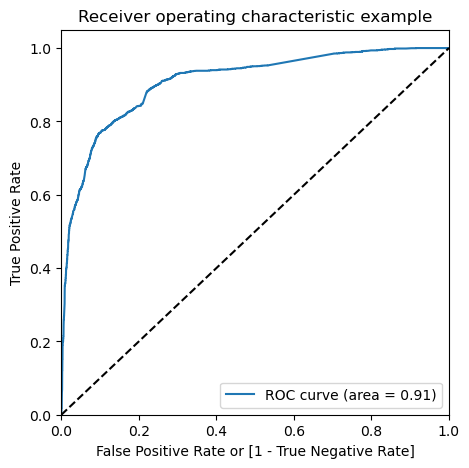

In [70]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [71]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.074214,0,1,0,0,0,0,0,0,0,0,0
1,0,0.094504,0,1,0,0,0,0,0,0,0,0,0
2,0,0.069392,0,1,0,0,0,0,0,0,0,0,0
3,0,0.077921,0,1,0,0,0,0,0,0,0,0,0
4,0,0.077921,0,1,0,0,0,0,0,0,0,0,0


In [72]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.37712,1.000000,0.000000
0.1,0.1,0.72128,0.941451,0.587978
0.2,0.2,0.79168,0.921935,0.712818
0.3,0.3,0.82096,0.834111,0.812998
0.4,0.4,0.84544,0.781078,0.884408
0.5,0.5,0.85136,0.752227,0.911379
0.6,0.6,0.84400,0.709801,0.925250
0.7,0.7,0.82336,0.606703,0.954534
0.8,0.8,0.80496,0.519728,0.977652
0.9,0.9,0.76960,0.411964,0.986129


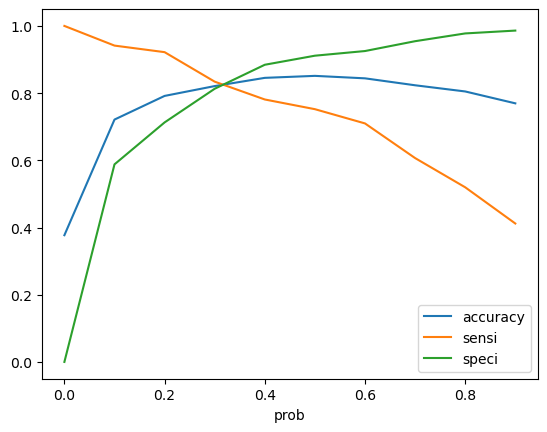

In [73]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [74]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.074214,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.094504,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.069392,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.077921,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.077921,0,1,0,0,0,0,0,0,0,0,0,0


In [75]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.83712

In [76]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3332,  561],
       [ 457, 1900]], dtype=int64)

In [77]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [78]:
# Calculating the sensitivity
TP/(TP+FN)

0.8061094611794655

In [79]:
# Calculating the specificity
TN/(TN+FP)

0.8558951965065502

In [80]:
## pred on test set

In [81]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
col = X_train.columns

In [82]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Quality_not provided,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
6294,1.0,0.000000,0.000000,0,0,1,0,1,0,0,0,0,1,0,0
3745,1.0,0.307692,0.307692,0,0,0,0,1,0,0,0,1,0,0,0
1630,1.0,0.230769,0.230769,0,0,0,0,0,1,0,0,0,0,0,0
216,1.0,0.153846,0.153846,0,0,0,0,0,0,0,0,1,0,0,0
6767,1.0,0.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4168,1.0,0.230769,0.230769,0,0,0,0,1,1,1,0,0,0,0,0
2658,1.0,0.000000,0.000000,1,0,0,0,1,1,1,0,0,0,0,0
8361,1.0,0.153846,0.153846,0,0,1,0,1,0,0,1,0,0,0,0
1541,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0


In [83]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.086719
1,0,0.053895
2,1,0.954857
3,1,0.007892
4,1,0.772024


In [84]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.086719,0
1,0,0.053895,0
2,1,0.954857,1
3,1,0.007892,0
4,1,0.772024,1
...,...,...,...
2674,1,0.954821,1
2675,1,0.988535,1
2676,0,0.109405,0
2677,0,0.077921,0


In [85]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.795819335572975

In [86]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1349,  302],
       [ 245,  783]], dtype=int64)

In [87]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [88]:
TP/(TP+FN)

0.7616731517509727

In [89]:
# Calculating the specificity
TN/(TN+FP)

0.8170805572380375

In [90]:
## precision-recall
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3548,  345],
       [ 584, 1773]], dtype=int64)

In [91]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8371104815864022

In [92]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7522274077216801

In [93]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6245    1
 6246    1
 6247    0
 6248    0
 6249    1
 Name: Converted, Length: 6250, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6245    1
 6246    1
 6247    0
 6248    0
 6249    1
 Name: Predicted, Length: 6250, dtype: int64)

In [94]:
from sklearn.metrics import precision_recall_curve

In [95]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

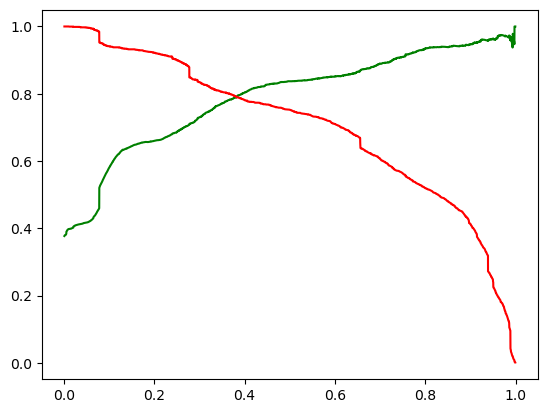

In [96]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [97]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.074214,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.094504,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.069392,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.077921,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.077921,0,1,0,0,0,0,0,0,0,0,0,0


In [98]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8472

In [99]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3465,  428],
       [ 527, 1830]], dtype=int64)

In [100]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [101]:
TP / (TP + FP)

0.8104517271922055

In [102]:
TP / (TP + FN)

0.7764106915570641

# PRED test

In [103]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.086719
1,0,0.053895
2,1,0.954857
3,1,0.007892
4,1,0.772024


In [104]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.086719,0
1,0,0.053895,0
2,1,0.954857,1
3,1,0.007892,0
4,1,0.772024,1
...,...,...,...
2674,1,0.954821,1
2675,1,0.988535,1
2676,0,0.109405,0
2677,0,0.077921,0


In [105]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8070175438596491

In [106]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1462,  189],
       [ 328,  700]], dtype=int64)

In [107]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [108]:
TP / (TP + FP) #specificity

0.7874015748031497

In [109]:
TP / (TP + FN) #sensitivity

0.6809338521400778

1   TotalVisits	
2	Page Views Per Visit	
3	Lead Quality_Might be	
4	Last Activity_SMS Sent	
5	Lead Quality_India	
6	Lead Origin_Lead Add Form	
7	Lead Quality_Not Sure	
8	Lead Source_Welingak Website	
9	What is your current occupation_Working Profes...	
10	Do Not Email_Yes	
11	Lead Quality_Worst	
12	Last Notable Activity_Unsubscribed	
13 Last Activity_Had a Phone Conversation	
14	Last Notable Activity_Unreachable	